# Classification

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import re

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## Read file

In [2]:
df = pd.read_csv('../Data/dataset_others_class.csv')

In [3]:
df = df.rename(columns={'F_Close_pred_class':'Prediction'})

In [4]:
df

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,Prediction
0,2019-11-26 00:00:00+00:00,0.751665,0.751705,0.752842,0.750999,0.0,-0.000418,0.000000,0.000418,0.000289,...,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,8.586074,1
1,2019-11-27 00:00:00+00:00,0.753597,0.753636,0.754205,0.752502,0.0,0.001932,0.001932,0.000000,0.000427,...,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,8.647842,0
2,2019-11-29 00:00:00+00:00,0.753125,0.753029,0.753211,0.751145,0.0,-0.000607,0.000000,0.000607,0.000427,...,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,8.712270,0
3,2019-12-02 00:00:00+00:00,0.752734,0.752791,0.753296,0.751569,0.0,-0.000238,0.000000,0.000238,0.000419,...,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,8.717381,0
4,2019-12-03 00:00:00+00:00,0.751552,0.751710,0.752899,0.750728,0.0,-0.001081,0.000000,0.001081,0.000419,...,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,8.712161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-10-22 00:00:00+00:00,0.722883,0.722883,0.723877,0.722684,0.0,-0.001776,0.000000,0.001776,0.000308,...,63.192190,91.764633,-8.235367,0.063288,0.007636,6.315788,6.779642e+07,11.195281,10.306719,0
1233,2024-10-23 00:00:00+00:00,0.723788,0.723788,0.723809,0.721433,0.0,0.000905,0.000905,0.000000,0.000245,...,59.825069,80.219848,-19.780152,0.071755,0.020460,4.635769,6.762839e+07,11.223237,10.297763,1
1234,2024-10-24 00:00:00+00:00,0.722716,0.722716,0.724008,0.721480,0.0,-0.001072,0.000000,0.001072,0.000245,...,67.105734,98.850548,-1.149452,0.091931,0.034754,7.149667,6.835647e+07,11.282170,10.320830,0
1235,2024-10-25 00:00:00+00:00,0.721850,0.721850,0.722648,0.720170,0.0,-0.000866,0.000000,0.000866,0.000245,...,56.038726,72.631549,-27.368451,0.093129,0.046429,4.237286,6.776479e+07,11.312438,10.329562,1


In [5]:
open_cols = [col for col in df.columns if '_Open' in col]
close_cols = [col for col in df.columns if '_Close' in col]
high_cols = [col for col in df.columns if '_High' in col]
low_cols = [col for col in df.columns if '_Low' in col]
vol_cols = [col for col in df.columns if '_Volume' in col]

In [6]:
close_cols

['CADUSD=X_Close',
 'GM_Close',
 'JCI_Close',
 'TM_Close',
 'TRYUSD=X_Close',
 '^IXIC_Close']

In [7]:
#df.rename(columns={'DNZOY_Close_pred_class':'Prediction'})

In [8]:
df = df.drop(columns=open_cols)
df = df.drop(columns=close_cols)
df = df.drop(columns=high_cols)
df = df.drop(columns=low_cols)
df = df.drop(columns=vol_cols)

df

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,Prediction
0,2019-11-26 00:00:00+00:00,-0.000418,0.000000,0.000418,0.000289,0.000910,0.756581,0.756180,-0.000418,27.821853,...,0.010000,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,1
1,2019-11-27 00:00:00+00:00,0.001932,0.001932,0.000000,0.000427,0.000767,0.756063,0.755938,0.001932,42.880806,...,0.090000,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,0
2,2019-11-29 00:00:00+00:00,-0.000607,0.000000,0.000607,0.000427,0.000641,0.755736,0.755661,-0.000607,39.864127,...,-0.040000,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,0
3,2019-12-02 00:00:00+00:00,-0.000238,0.000000,0.000238,0.000419,0.000658,0.755404,0.755387,-0.000238,38.634678,...,-0.050000,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,0
4,2019-12-03 00:00:00+00:00,-0.001081,0.000000,0.001081,0.000419,0.000707,0.754937,0.755037,-0.001081,33.260985,...,-0.120000,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-10-22 00:00:00+00:00,-0.001776,0.000000,0.001776,0.000308,0.001477,0.733303,0.730472,-0.001776,22.129881,...,0.230000,63.192190,91.764633,-8.235367,0.063288,0.007636,6.315788,6.779642e+07,11.195281,0
1233,2024-10-23 00:00:00+00:00,0.000905,0.000905,0.000000,0.000245,0.001477,0.732536,0.729835,0.000905,28.290869,...,-0.049999,59.825069,80.219848,-19.780152,0.071755,0.020460,4.635769,6.762839e+07,11.223237,1
1234,2024-10-24 00:00:00+00:00,-0.001072,0.000000,0.001072,0.000245,0.001513,0.731416,0.729157,-0.001072,25.529720,...,0.179999,67.105734,98.850548,-1.149452,0.091931,0.034754,7.149667,6.835647e+07,11.282170,0
1235,2024-10-25 00:00:00+00:00,-0.000866,0.000000,0.000866,0.000245,0.001406,0.730423,0.728461,-0.000866,23.401396,...,-0.170000,56.038726,72.631549,-27.368451,0.093129,0.046429,4.237286,6.776479e+07,11.312438,1


In [9]:
#correlation = df.loc[:, df.columns != 'Date'].corr()
#plt.figure(figsize=(15,15))
#plt.title('Correlation Matrix')
#sns.heatmap(correlation, vmax=1, square=True,annot=True)

## CADUSD=X and F

In [10]:
F_cols = [col for col in df.columns if 'F_' in col]
CADUSD_cols = F_cols.copy()

for col in df.columns:
    if 'CADUSD=X' in col:
        CADUSD_cols.append(col)
        
CADUSD_cols.append('Prediction')
CADUSD_cols

['F_Change',
 'F_Gain',
 'F_Loss',
 'F_Avg_Gain',
 'F_Avg_Loss',
 'F_SMA',
 'F_EMA',
 'F_change_in_price',
 'F_RSI',
 'F_k_percent',
 'F_r_percent',
 'F_MACD',
 'F_MACD_EMA',
 'F_ROC',
 'F_PVT',
 'F_Bollinger_Upper',
 'CADUSD=X_Change',
 'CADUSD=X_Gain',
 'CADUSD=X_Loss',
 'CADUSD=X_Avg_Gain',
 'CADUSD=X_Avg_Loss',
 'CADUSD=X_SMA',
 'CADUSD=X_EMA',
 'CADUSD=X_change_in_price',
 'CADUSD=X_RSI',
 'CADUSD=X_k_percent',
 'CADUSD=X_r_percent',
 'CADUSD=X_MACD',
 'CADUSD=X_MACD_EMA',
 'CADUSD=X_ROC',
 'CADUSD=X_PVT',
 'CADUSD=X_Bollinger_Upper',
 'Prediction']

In [11]:
df_CADUSD = df[CADUSD_cols].copy()
df_CADUSD

,F_Change,F_Gain,F_Loss,F_Avg_Gain,F_Avg_Loss,F_SMA,F_EMA,F_change_in_price,F_RSI,F_k_percent,...,CADUSD=X_change_in_price,CADUSD=X_RSI,CADUSD=X_k_percent,CADUSD=X_r_percent,CADUSD=X_MACD,CADUSD=X_MACD_EMA,CADUSD=X_ROC,CADUSD=X_PVT,CADUSD=X_Bollinger_Upper,Prediction
0,0.010000,0.010000,0.000000,0.046429,0.040000,8.8875,8.851336,0.010000,62.087549,73.913071,...,-0.000418,27.821853,12.661161,-87.338839,-0.001154,-0.000859,-0.571288,0.0,0.763428,1
1,0.090000,0.090000,0.000000,0.052857,0.037857,8.9155,8.875019,0.090000,67.610216,89.583482,...,0.001932,42.880806,41.285261,-58.714739,-0.001081,-0.000904,-0.330094,0.0,0.762062,0
2,-0.040000,0.000000,0.040000,0.042143,0.040714,8.9390,8.892636,-0.040000,62.910674,81.250149,...,-0.000607,39.864127,33.284381,-66.715619,-0.001052,-0.000934,-0.359200,0.0,0.761643,0
3,-0.050000,0.000000,0.050000,0.039286,0.044286,8.9450,8.903813,-0.050000,57.178300,70.833433,...,-0.000238,38.634678,30.147798,-69.852202,-0.001033,-0.000954,-0.355312,0.0,0.761178,0
4,-0.120000,0.000000,0.120000,0.039286,0.050000,8.9395,8.902498,-0.120000,45.657569,45.833433,...,-0.001081,33.260985,15.907520,-84.092480,-0.001081,-0.000979,-0.384124,0.0,0.760288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,0.230000,0.230000,0.000000,0.074286,0.048571,10.7510,10.840467,0.230000,63.192190,91.764633,...,-0.001776,22.129881,3.953370,-96.046630,-0.003527,-0.002304,-2.375397,0.0,0.748374,0
1233,-0.049999,0.000000,0.049999,0.074286,0.032857,10.7605,10.861375,-0.049999,59.825069,80.219848,...,0.000905,28.290869,12.411880,-87.588120,-0.003601,-0.002564,-1.939757,0.0,0.747917,1
1234,0.179999,0.179999,0.000000,0.087143,0.030714,10.8015,10.897435,0.179999,67.105734,98.850548,...,-0.001072,25.529720,7.588977,-92.411023,-0.003704,-0.002792,-1.580583,0.0,0.746194,0
1235,-0.170000,0.000000,0.170000,0.078571,0.042857,10.8210,10.913869,-0.170000,56.038726,72.631549,...,-0.000866,23.401396,11.514332,-88.485668,-0.003811,-0.002996,-1.453081,0.0,0.744954,1


## Histogram

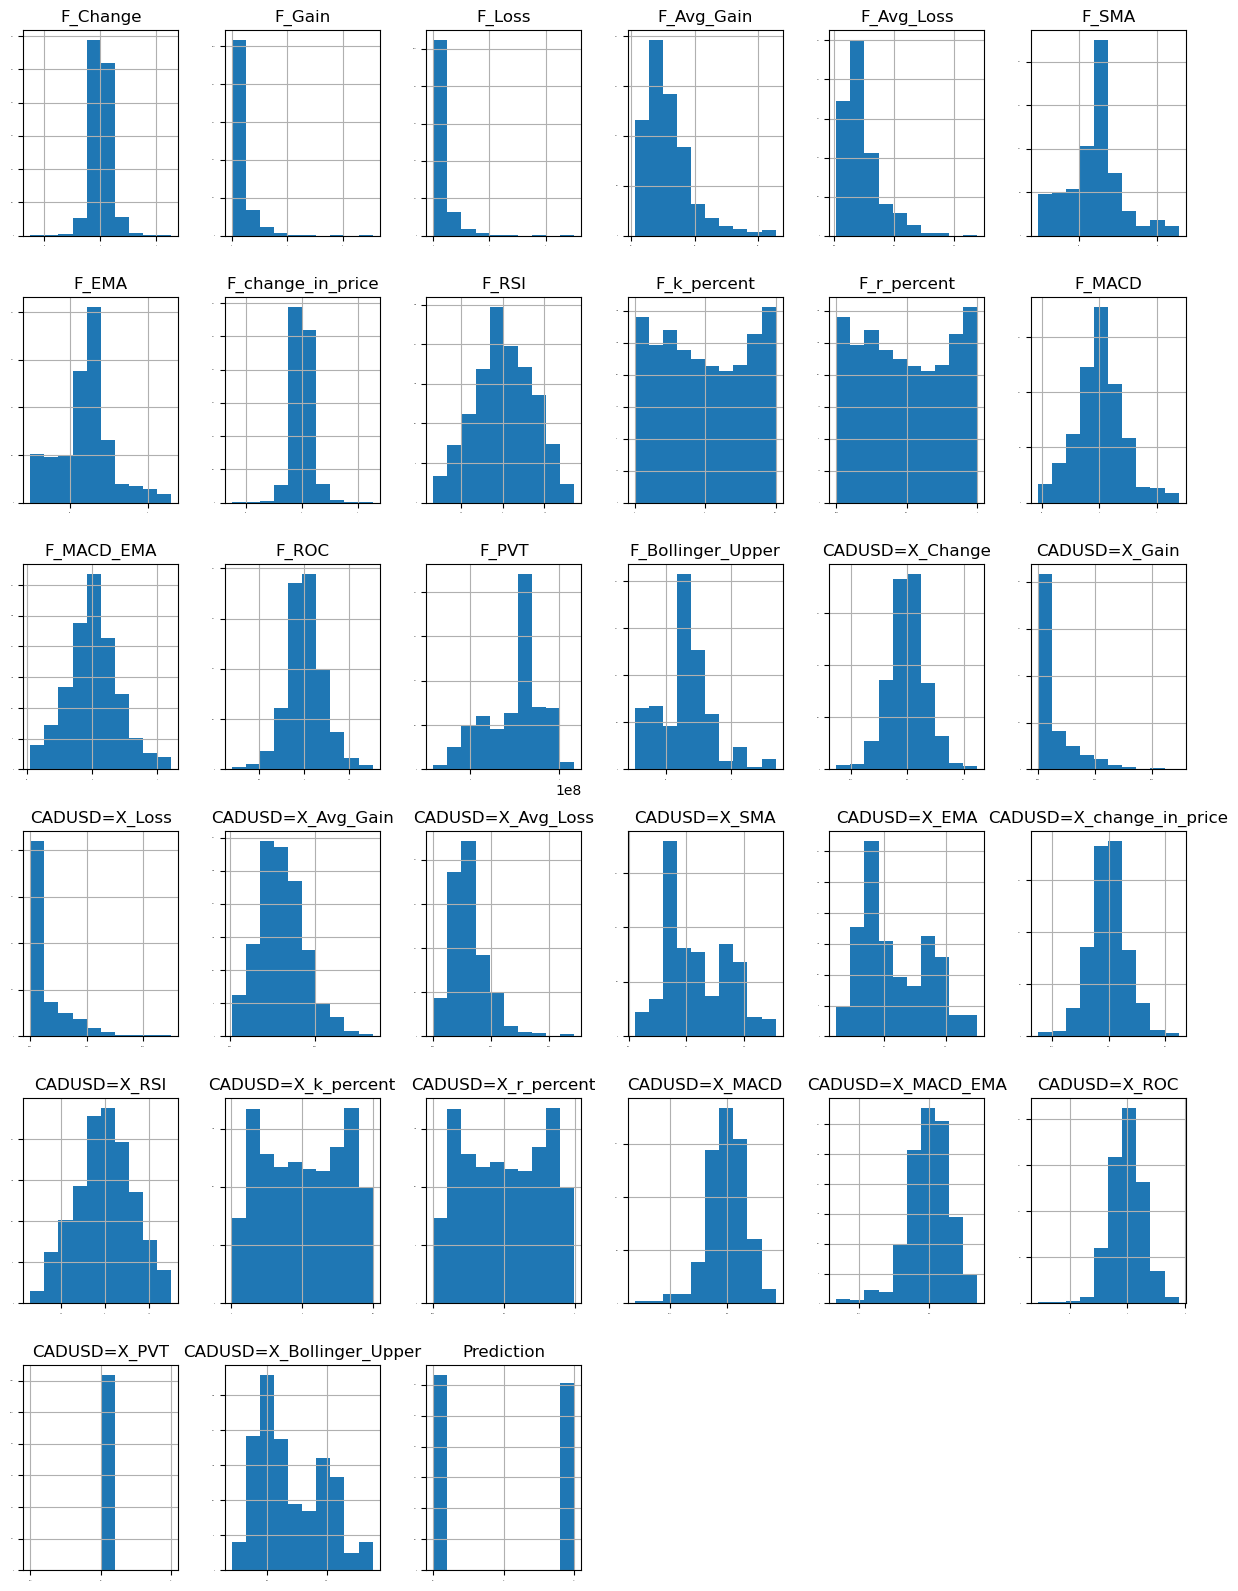

In [12]:
df_CADUSD.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,20))
plt.show()

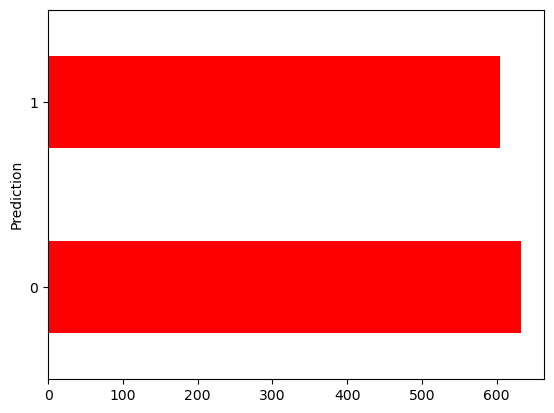

In [13]:
fig = plt.figure()
plot = df_CADUSD.groupby(['Prediction']).size().plot(kind='barh', color='red')
plt.show()

In [14]:
sum(df_CADUSD['Prediction'])/len(df_CADUSD)

0.4890864995957963

This indicates that we would sell less than buy.

In [15]:
df['CADUSD=X_PVT']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1232    0.0
1233    0.0
1234    0.0
1235    0.0
1236    0.0
Name: CADUSD=X_PVT, Length: 1237, dtype: float64

In [16]:
PVT = [col for col in df.columns if '_PVT' in col]

In [17]:
df[PVT]

,CADUSD=X_PVT,GM_PVT,JCI_PVT,TM_PVT,TRYUSD=X_PVT,^IXIC_PVT,F_PVT
0,0.0,-8.069465e+05,-1.049253e+05,4652.864943,0.0,8.590358e+07,2.394865e+06
1,0.0,-7.695503e+05,-9.218490e+04,4260.045613,0.0,9.747893e+07,2.768411e+06
2,0.0,-7.847627e+05,-1.042357e+05,3156.631332,0.0,9.246527e+07,2.710846e+06
3,0.0,-8.073692e+05,-1.778949e+05,3207.039378,0.0,6.726371e+07,2.505366e+06
4,0.0,-8.874659e+05,-2.275948e+05,3565.470008,0.0,5.444920e+07,1.963927e+06
...,...,...,...,...,...,...,...
1232,0.0,3.677383e+07,-1.174051e+06,157305.663083,0.0,3.517081e+09,6.779642e+07
1233,0.0,3.653097e+07,-1.180926e+06,160584.681901,0.0,3.415187e+09,6.762839e+07
1234,0.0,3.648637e+07,-1.161040e+06,159069.170091,0.0,3.458953e+09,6.835647e+07
1235,0.0,3.638225e+07,-1.166079e+06,161592.346906,0.0,3.493111e+09,6.776479e+07


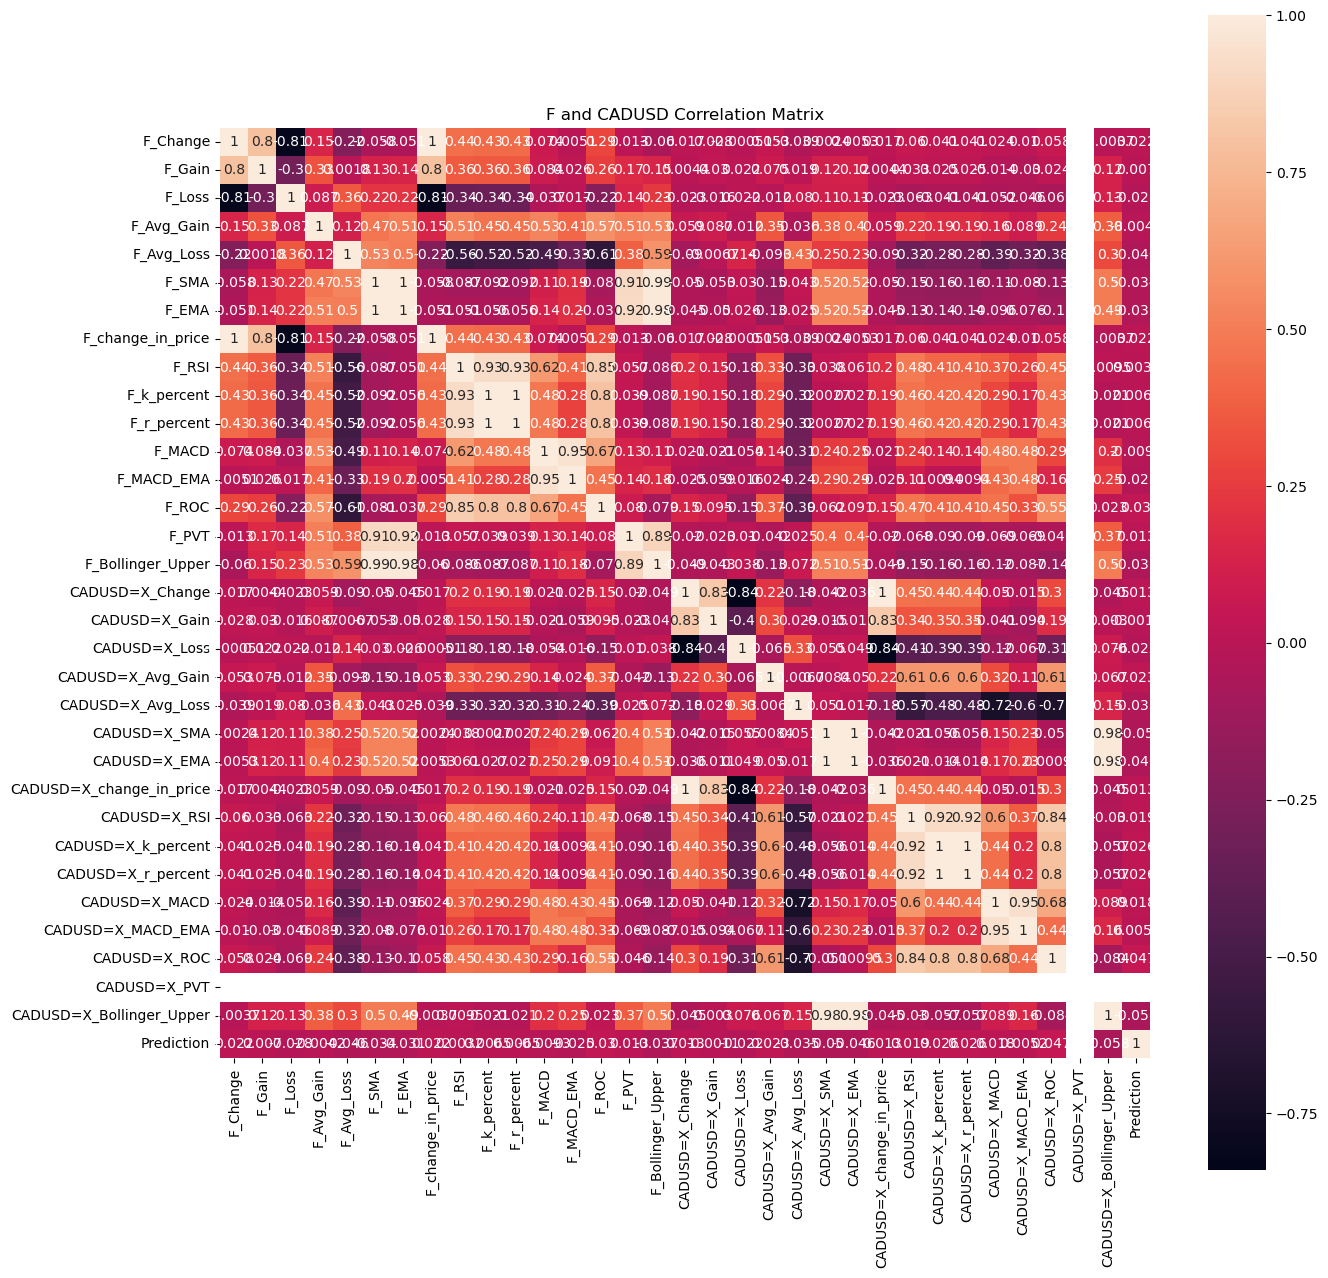

In [18]:
correlation_CADUSD = df_CADUSD.corr()
plt.figure(figsize=(15,15))
plt.title('F and CADUSD Correlation Matrix')
sns.heatmap(correlation_CADUSD, vmax=1, square=True, annot=True)
plt.show()

In [19]:
df_CADUSD = df_CADUSD.drop(columns='CADUSD=X_PVT')

In [20]:
df_CADUSD.columns

Index(['F_Change', 'F_Gain', 'F_Loss', 'F_Avg_Gain', 'F_Avg_Loss', 'F_SMA',
       'F_EMA', 'F_change_in_price', 'F_RSI', 'F_k_percent', 'F_r_percent',
       'F_MACD', 'F_MACD_EMA', 'F_ROC', 'F_PVT', 'F_Bollinger_Upper',
       'CADUSD=X_Change', 'CADUSD=X_Gain', 'CADUSD=X_Loss',
       'CADUSD=X_Avg_Gain', 'CADUSD=X_Avg_Loss', 'CADUSD=X_SMA',
       'CADUSD=X_EMA', 'CADUSD=X_change_in_price', 'CADUSD=X_RSI',
       'CADUSD=X_k_percent', 'CADUSD=X_r_percent', 'CADUSD=X_MACD',
       'CADUSD=X_MACD_EMA', 'CADUSD=X_ROC', 'CADUSD=X_Bollinger_Upper',
       'Prediction'],
      dtype='object')

# Train-test split

In [21]:
def split_1(df, ticker: str, test_size = 0.20):
    F_cols = [col for col in df.columns if 'F_' in col]
    cols = F_cols.copy()

    for col in df.columns:
        if ticker in col and 'CADUSD=X_PVT' not in col and 'TRYUSD=PVT' not in col:
            cols.append(col)

    #for col in cols:
    #    if 'CADUSD' in col or 'TRYUSD' in col:    
        
    cols.append('Prediction')
    df1 = df[cols].copy()
    df1 = df1.dropna()

    y = df1['Prediction']
    X = df1.drop(['Prediction'], axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify=y, random_state = 132)

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = split_1(df, 'CADUSD', test_size = 0.20)

In [23]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
# Number of features to consider at every split
#max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
#max_depth = [2, 4]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Criterion
#criterion = ['gini', 'entropy', 'log_loss']

## Build Random Forest Model with hyperparamters

In [24]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
n_estimators = [20, 50, 100, 500, 1000, 2000]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [2, 4, 10, 20, 50, 100]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
#criterion = ['gini', 'entropy', 'log_loss']

# Create parameter grids
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap#,
    #'criterion': criterion
}

In [26]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


In [53]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    #errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    
    return accuracy*100

In [30]:
best_grid

RandomForestClassifier(max_depth=2, max_features='log2', min_samples_split=5,
                       n_estimators=20)

In [42]:
len(base_model.predict(X_test))

248

In [43]:
len(y_test)

248

In [46]:
abs(base_model.predict(X_test) - y_test)/y_test

448     NaN
411     inf
968     NaN
1130    NaN
1024    0.0
       ... 
712     NaN
156     1.0
952     0.0
980     1.0
180     inf
Name: Prediction, Length: 248, dtype: float64

In [54]:
# Base model
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
print('Base model accuracy:', base_accuracy) 

# best grid
best_grid = grid_search.best_estimator_
best_accuracy = evaluate(best_grid, X_test, y_test)
print('Best Grid search model accuracy:', best_accuracy) 


print('Improvement of {:0.2f}%.'.format(100 * (best_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 56.45%.
Base model accuracy: 56.451612903225815
Model Performance
Accuracy = 48.79%.
Best Grid search model accuracy: 48.79032258064516
Improvement of -13.57%.


In [83]:
#base_model.fit(X_train, y_train)
#accuracy_score(y_test, base_model.fit(X_test, y_test))

In [56]:
best_grid.feature_importances_

array([0.03367126, 0.        , 0.02061233, 0.02515455, 0.0327928 ,
       0.05447711, 0.03413694, 0.034315  , 0.        , 0.03914895,
       0.03020597, 0.04466757, 0.02859022, 0.06765849, 0.        ,
       0.01607595, 0.        , 0.        , 0.01283746, 0.06715916,
       0.03710331, 0.02318246, 0.        , 0.06762055, 0.01198918,
       0.11186012, 0.05859021, 0.09250726, 0.03181374, 0.        ,
       0.02382944])

In [69]:
X_train.columns

Index(['F_Change', 'F_Gain', 'F_Loss', 'F_Avg_Gain', 'F_Avg_Loss', 'F_SMA',
       'F_EMA', 'F_change_in_price', 'F_RSI', 'F_k_percent', 'F_r_percent',
       'F_MACD', 'F_MACD_EMA', 'F_ROC', 'F_PVT', 'F_Bollinger_Upper',
       'CADUSD=X_Change', 'CADUSD=X_Gain', 'CADUSD=X_Loss',
       'CADUSD=X_Avg_Gain', 'CADUSD=X_Avg_Loss', 'CADUSD=X_SMA',
       'CADUSD=X_EMA', 'CADUSD=X_change_in_price', 'CADUSD=X_RSI',
       'CADUSD=X_k_percent', 'CADUSD=X_r_percent', 'CADUSD=X_MACD',
       'CADUSD=X_MACD_EMA', 'CADUSD=X_ROC', 'CADUSD=X_Bollinger_Upper'],
      dtype='object')

In [70]:
feature_names = [col for col in X_train.columns]

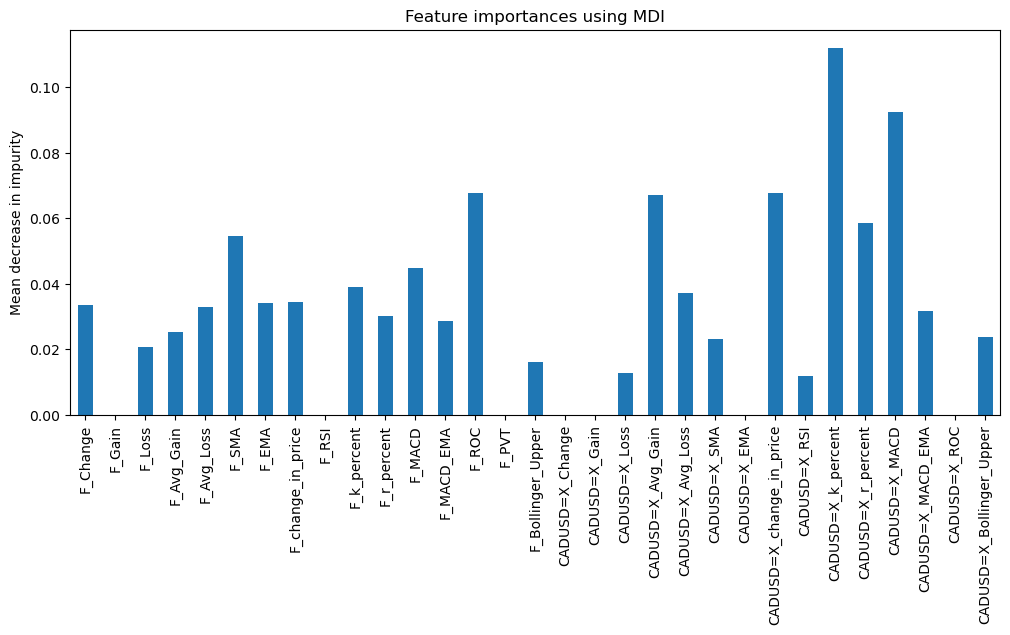

In [79]:
importances = best_grid.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()
#fig.tight_layout()


Text(0.5, 1.0, 'Random Forest: Feature Importance Graph')

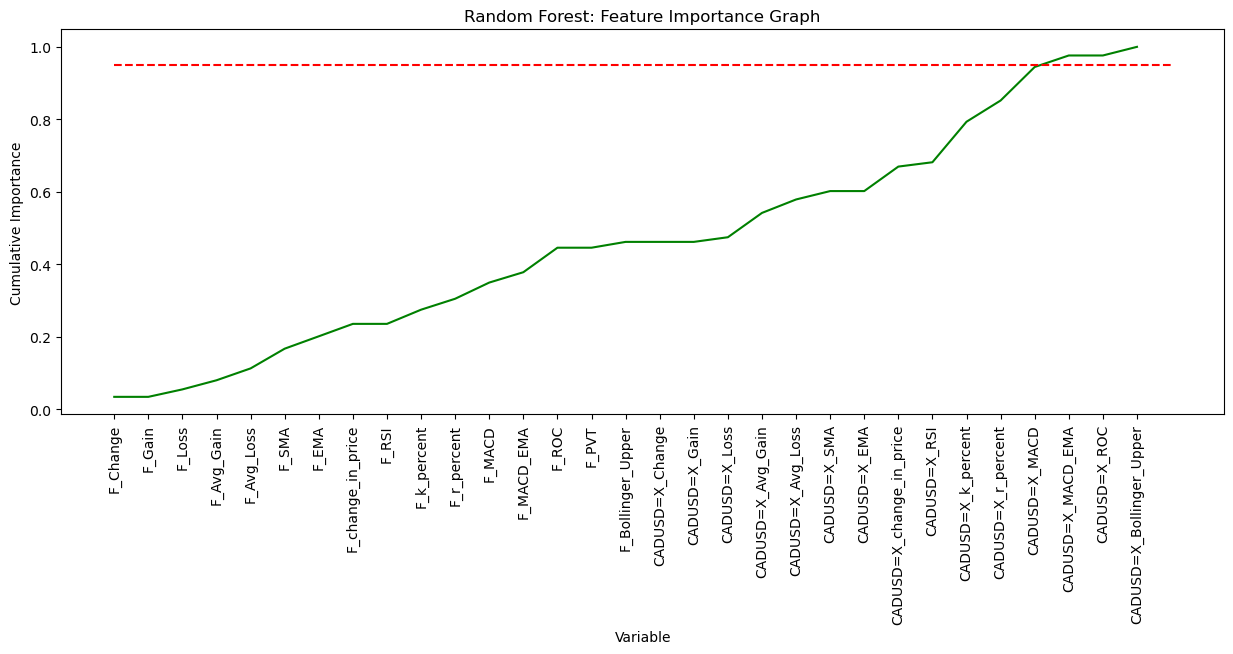

In [82]:
# store the values in a list to plot.
x_values = list(range(len(importances)))

# Cumulative importances
cumulative_importances = np.cumsum(forest_importances.values)

# Make a line graph
plt.figure(figsize=(15,5))
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin = 0, xmax = len(importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, forest_importances.index, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Random Forest: Feature Importance Graph')

Mean decrease in impurity is a metric used in decision trees to evaluate the importance of a feature by measuring the reduction in impurity it brings to the model. Specifically, it calculates how much a feature contributes to reducing impurity measures like Gini impurity or entropy when making splits in the data.

In [72]:
forest_importances

F_Change                    0.033671
F_Gain                      0.000000
F_Loss                      0.020612
F_Avg_Gain                  0.025155
F_Avg_Loss                  0.032793
F_SMA                       0.054477
F_EMA                       0.034137
F_change_in_price           0.034315
F_RSI                       0.000000
F_k_percent                 0.039149
F_r_percent                 0.030206
F_MACD                      0.044668
F_MACD_EMA                  0.028590
F_ROC                       0.067658
F_PVT                       0.000000
F_Bollinger_Upper           0.016076
CADUSD=X_Change             0.000000
CADUSD=X_Gain               0.000000
CADUSD=X_Loss               0.012837
CADUSD=X_Avg_Gain           0.067159
CADUSD=X_Avg_Loss           0.037103
CADUSD=X_SMA                0.023182
CADUSD=X_EMA                0.000000
CADUSD=X_change_in_price    0.067621
CADUSD=X_RSI                0.011989
CADUSD=X_k_percent          0.111860
CADUSD=X_r_percent          0.058590
C

In [ ]:
#grid_accuracy = evaluate(best_grid, X_test, y_test)

In [ ]:
#rf_Model = RandomForestClassifier()

In [ ]:
#rf_Grid = GridSearchCV(estimator = rf_Model, param_grid =param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [ ]:
#rf_Grid.fit(X_train, y_train)

In [ ]:
#rf_Grid.best_params_

In [ ]:
#rf_Grid.score(X_train, y_train)

In [ ]:
#rf_Grid.predict(X_test)

In [ ]:
#rf_Grid.score(rf_grid.predict(X_test), y_test)

## Classification models

In [ ]:
#tree = DecisionTreeClassifier(
    #max_depth = 10, 
#    min_samples_leaf = 5, # minimum number of samples in each leaf, to prevent overfitting
#    random_state= 216)

#rf = RandomForestClassifier(
#    n_estimators = 500, # number of trees in ensemble
    #max_depth = 10, # max_depth of each tree
#    min_samples_leaf = 5, 
#    max_features = 2, # default is round(sqrt(num_features)), which in this case is 1.
#    bootstrap= True, # sampling with replacement
#    max_samples = 500, # number of training samples selected with replacement to build tree
#    random_state = 216 # for consistency
#    )

#rand_first_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

In [ ]:
#Y = df['Prediction']
#X = df.loc[:, (df.columns != 'Date') & (df.columns != 'Prediction')]

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [ ]:
## Fit the models
#tree.fit(X_train, Y_train)
#print(accuracy_score(Y_test, tree.predict(X_test)))

## rf and et may take slightly longer because we are fitting many trees
#rf.fit(X_train, Y_train)
#print(accuracy_score(Y_test, rf.predict(X_test)))

#rand_first_clf.fit(X_train, Y_train)
#print(accuracy_score(Y_test, rand_first_clf.predict(X_test)))

In [ ]:
## Confusion_matrix
#print('Decision Tree')
#print(confusion_matrix(Y_test, tree.predict(X_test)))
#print('---------------------')
#print('Random Forest 1')
#print(confusion_matrix(Y_test, rf.predict(X_test)))
#print('---------------------')
#print('Random Forest 2')
#print(confusion_matrix(Y_test, rand_first_clf.predict(X_test)))